# 입력 데이터의 크기와 정확도의 상관관계

# 입력 데이터의 크기는 50개 - 2,5000개 (2495씩 증가)

In [1]:
def handling_input_data_size(input):
    
    # IMDB Data set Load

    from keras.datasets import imdb
    input_words=input
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=input_words)
    
    
    # Encoding the integer sequences into a binary matrix
    
    import numpy as np
    
    def vectorize_sequences(sequences,dimension=input_words):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i,sequence] = 1.
        return results
    
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
    
    y_train = np.asarray(train_labels).astype('float32')
    y_test = np.asarray(test_labels).astype('float32')
    
    
    # Model definition
    
    from keras import models
    from keras import layers
    
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(input_words,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    
    # Compiling the model
    
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    
    # Configuring the optimizer
    #from keras import optimizers -> AttributeError: module 'keras.optimizers' has no attribute 'RMSprop'
    
    from tensorflow.keras import optimizers
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    
    # Using custom losses and metrics
    
    from keras import losses
    from keras import metrics
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
    
    
    # Setting aside a validation set
    
    x_val = x_train[:input_words]
    partial_x_train = x_train[input_words:]
    y_val = y_train[:input_words]
    partial_y_train = y_train[input_words:]
    
    
    # Training your model
    
    model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
    history = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))
    
    
    # Plotting the training and validation loss
    
    #import matplotlib.pyplot as plt
    #
    #history_dict = history.history
    #loss_values = history_dict['loss'] 
    #val_loss_values = history_dict['val_loss']
    #
    #epochs = range(1, len(loss_values) + 1)
    #
    #plt.plot(epochs, loss_values, 'bo', label='Training loss') 
    #plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    #plt.title('Training and validation loss') 
    #plt.xlabel('Epochs')
    #plt.ylabel('Loss') 
    #plt.legend()
    #
    #plt.show()
    #
    #
    ## Plotting the training and validation accuracy
    #
    #plt.clf() # 생성한 그래프 초기화
    #acc = history_dict['acc'] 
    #val_acc = history_dict['val_acc']
    #plt.plot(epochs, acc, 'bo', label='Training acc') 
    #plt.plot(epochs, val_acc, 'b', label='Validation acc') 
    #plt.title('Training and validation accuracy') 
    #plt.xlabel('Epochs')
    #plt.ylabel('Acc') 
    #plt.legend()
    #plt.show()
    
    
    # Retraining a model from scratch
    
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(input_words,))) 
    model.add(layers.Dense(16, activation='relu')) 
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=4, batch_size=512) 
    results = model.evaluate(x_test, y_test)
    return results

In [2]:
x_list = []
y_list = []
j = 49
for i in range(11):
    
    x_Accuracy, y_Accuracy = handling_input_data_size(j)
    x_list.append(x_Accuracy)
    y_list.append(y_Accuracy)
    j+= 2495

print(x_list)
print(y_list)

Epoch 1/20


C:\Users\jw101\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


49/49 [==============================] - 1s 4ms/step - loss: 0.6890 - acc: 0.5387 - val_loss: 0.6758 - val_acc: 0.6122
Epoch 2/20
49/49 [==============================] - 0s 2ms/step - loss: 0.6815 - acc: 0.5688 - val_loss: 0.6632 - val_acc: 0.6327
Epoch 3/20
49/49 [==============================] - 0s 1ms/step - loss: 0.6734 - acc: 0.5837 - val_loss: 0.6542 - val_acc: 0.6735
Epoch 4/20
49/49 [==============================] - 0s 1ms/step - loss: 0.6680 - acc: 0.5919 - val_loss: 0.6490 - val_acc: 0.6531
Epoch 5/20
49/49 [==============================] - 0s 1ms/step - loss: 0.6645 - acc: 0.5994 - val_loss: 0.6552 - val_acc: 0.5918
Epoch 6/20
49/49 [==============================] - 0s 2ms/step - loss: 0.6622 - acc: 0.6039 - val_loss: 0.6439 - val_acc: 0.6531
Epoch 7/20
49/49 [==============================] - 0s 2ms/step - loss: 0.6608 - acc: 0.6087 - val_loss: 0.6371 - val_acc: 0.6327
Epoch 8/20
49/49 [==============================] - 0s 1ms/step - loss: 0.6598 - acc: 0.6084 - val_lo

39/39 [==============================] - 0s 8ms/step - loss: 0.1024 - acc: 0.9635 - val_loss: 0.4298 - val_acc: 0.8712
Epoch 17/20
39/39 [==============================] - 0s 8ms/step - loss: 0.0974 - acc: 0.9654 - val_loss: 0.4491 - val_acc: 0.8651
Epoch 18/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0897 - acc: 0.9688 - val_loss: 0.4842 - val_acc: 0.8643
Epoch 19/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0831 - acc: 0.9705 - val_loss: 0.4722 - val_acc: 0.8688
Epoch 20/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0804 - acc: 0.9720 - val_loss: 0.4905 - val_acc: 0.8653
Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.4479 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.8982
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.9121
Epoch 4/4
782/782 [==============================] - 1s 809us/step

25/25 [==============================] - 0s 19ms/step - loss: 0.0936 - acc: 0.9751 - val_loss: 0.3042 - val_acc: 0.8837
Epoch 8/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0730 - acc: 0.9828 - val_loss: 0.3221 - val_acc: 0.8800
Epoch 9/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0588 - acc: 0.9880 - val_loss: 0.3437 - val_acc: 0.8794
Epoch 10/20
25/25 [==============================] - 1s 24ms/step - loss: 0.0459 - acc: 0.9909 - val_loss: 0.3758 - val_acc: 0.8769
Epoch 11/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0355 - acc: 0.9941 - val_loss: 0.3913 - val_acc: 0.8766
Epoch 12/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0286 - acc: 0.9954 - val_loss: 0.4213 - val_acc: 0.8747
Epoch 13/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0212 - acc: 0.9968 - val_loss: 0.4573 - val_acc: 0.8724
Epoch 14/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0152 - acc: 0.

49/49 [==============================] - 1s 13ms/step - loss: 0.3000 - accuracy: 0.9133
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2009 - accuracy: 0.9389
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2952 - accuracy: 0.8842
Epoch 1/20
10/10 [==============================] - 2s 180ms/step - loss: 0.6373 - acc: 0.6526 - val_loss: 0.5472 - val_acc: 0.8347
Epoch 2/20
10/10 [==============================] - 1s 68ms/step - loss: 0.4622 - acc: 0.8888 - val_loss: 0.4637 - val_acc: 0.8557
Epoch 3/20
10/10 [==============================] - 1s 65ms/step - loss: 0.3459 - acc: 0.9333 - val_loss: 0.4030 - val_acc: 0.8628
Epoch 4/20
10/10 [==============================] - 1s 64ms/step - loss: 0.2730 - acc: 0.9475 - val_loss: 0.3606 - val_acc: 0.8751
Epoch 5/20
10/10 [==============================] - 1s 63ms/step - loss: 0.2133 - acc: 0.9629 - val_loss: 0.3354 - val_acc: 0.8768
Epoch 6/20
10/10 [==============================] - 1s 63ms

1/1 [==============================] - 1s 725ms/step - loss: 0.1448 - acc: 1.0000 - val_loss: 0.7368 - val_acc: 0.5000
Epoch 14/20
1/1 [==============================] - 1s 733ms/step - loss: 0.1321 - acc: 1.0000 - val_loss: 0.7407 - val_acc: 0.5000
Epoch 15/20
1/1 [==============================] - 1s 730ms/step - loss: 0.1207 - acc: 1.0000 - val_loss: 0.7447 - val_acc: 0.5000
Epoch 16/20
1/1 [==============================] - 1s 744ms/step - loss: 0.1107 - acc: 1.0000 - val_loss: 0.7484 - val_acc: 0.5000
Epoch 17/20
1/1 [==============================] - 1s 724ms/step - loss: 0.1019 - acc: 1.0000 - val_loss: 0.7525 - val_acc: 0.5000
Epoch 18/20
1/1 [==============================] - 1s 722ms/step - loss: 0.0936 - acc: 1.0000 - val_loss: 0.7566 - val_acc: 0.5000
Epoch 19/20
1/1 [==============================] - 1s 727ms/step - loss: 0.0861 - acc: 1.0000 - val_loss: 0.7607 - val_acc: 0.5000
Epoch 20/20
1/1 [==============================] - 1s 733ms/step - loss: 0.0794 - acc: 1.0000 -

In [3]:
import pandas as pd
data = [y_list]
columns = list(range(50,25001,2495))
index = ['정확도']

df = pd.DataFrame(data,columns = columns, index = index)
df.columns.name = '데이터 개수'
df

데이터 개수,50,2545,5040,7535,10030,12525,15020,17515,20010,22505,25000
정확도,0.5886,0.87812,0.87588,0.88376,0.887,0.879,0.88372,0.8842,0.87124,0.88148,0.88544


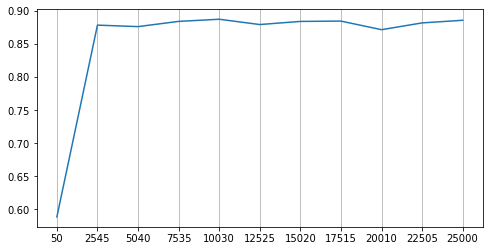

In [4]:
import matplotlib.pyplot as plt

x = df.columns
y = df.values[0]
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.xticks(list(range(50,27494,2495)))
plt.grid(True,axis='x')
plt.show()